In [1]:
import re 
import os
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/librosa/util/decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import of 'jit' requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit


In [2]:
audio="/Users/murielkosaka/Desktop/capstone_project/audio/audio_speech_actors_01-24/"


folders_main=os.listdir(audio)

In [3]:
dicts={'01' : 'neutral', '02' : 'calm', '03' : 'happy', '04' : 'sad', '05' : 'angry', '06' : 'fearful', '07' : 'disgust', '08' : 'surprised'}

In [4]:
y, sr = librosa.load('/Users/murielkosaka/Desktop/capstone_project/audio/audio_speech_actors_01-24/Actor_01/03-01-06-01-02-02-01.wav')
yt,_=librosa.effects.trim(y)
y=yt

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/librosa/display.py:862: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/librosa/display.py:862: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


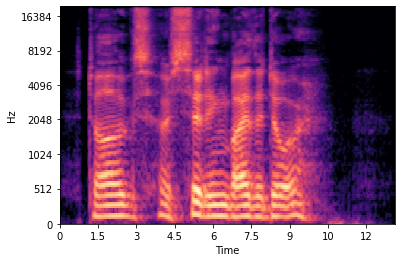

In [5]:
mel_spect = librosa.feature.melspectrogram(y=yt, sr=sr, n_fft=1024, hop_length=100)
mel_spect = librosa.power_to_db(mel_spect, ref=np.max)
librosa.display.specshow(mel_spect, y_axis='mel', fmax=20000, x_axis='time');

In [6]:
# EXTRACT LOG-MEL SPECTROGRAMS OF EACH AUDIO FILE AND SAVE TO FOLDER

# counter=0
# for folders in folders_main :
#     path_in='/Users/murielkosaka/Desktop/capstone_project/audio/audio_speech_actors_01-24/{0}'.format(folders)
#     files_sub=os.listdir(path_in)
#     for file in files_sub :
#         numbers = re.findall('\d+',file)
#         emotion=dicts[numbers[2]]
#         print(numbers[6],emotion)
#         path_save='/Users/murielkosaka/Desktop/capstone_project/sorted_data/{0}/{1}.jpeg'.format(emotion,file)
#         path_load='{0}/{1}'.format(path_in,file)
#         y, sr = librosa.load(path_load)
#         yt,_=librosa.effects.trim(y)
#         y=yt
#         mel_spect = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=1024, hop_length=100)
#         mel_spect = librosa.power_to_db(mel_spect, ref=np.max)
#         librosa.display.specshow(mel_spect, y_axis='mel', fmax=20000, x_axis='time');
#         plt.savefig(path_save)

In [7]:
from fastai.vision import *


In [8]:
path=Path('/Users/murielkosaka/Desktop/capstone_project/sorted_data')

In [9]:
path.ls

<bound method <lambda> of PosixPath('/Users/murielkosaka/Desktop/capstone_project/sorted_data')>

In [10]:
??get_transforms


In [11]:
tfms = get_transforms(do_flip=False,flip_vert=False, max_lighting=0.1, max_zoom=1.05, max_warp=0.,max_rotate=5)

In [12]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=tfms, size=144, num_workers=4).normalize(imagenet_stats)

In [13]:
data.classes


['angry', 'calm', 'disgust', 'fearful', 'happy', 'neutral', 'sad', 'surprised']

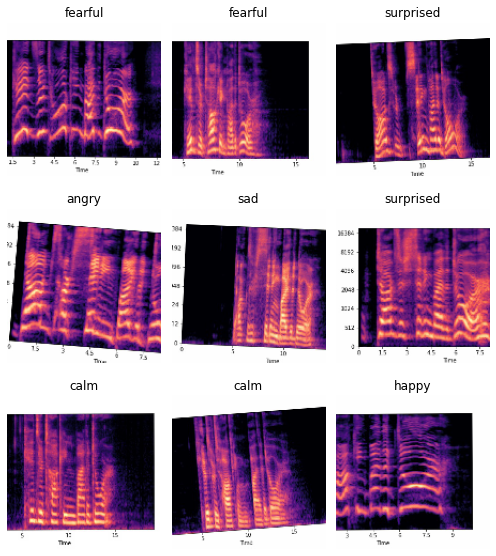

In [14]:
data.show_batch(rows=3, figsize=(7,8))


In [15]:
learn = cnn_learner(data, models.resnet34, metrics=accuracy)


In [16]:
learn.fit_one_cycle(5)


epoch,train_loss,valid_loss,accuracy,time
0,3.092586,2.022039,0.364583,02:19
1,2.680126,1.854234,0.440972,02:42
2,2.424871,1.689904,0.440972,02:31
3,2.228711,1.617108,0.465278,02:31
4,2.052536,1.611325,0.465278,02:31


In [17]:
learn.unfreeze()


In [18]:
learn.lr_find()


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


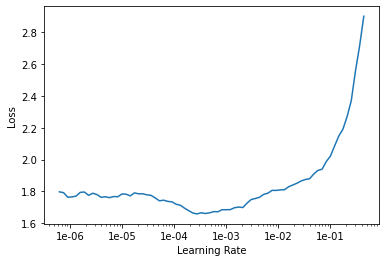

In [19]:
learn.recorder.plot()


In [20]:
learn.fit_one_cycle(5, max_lr=slice(1e-5,1e-4))


epoch,train_loss,valid_loss,accuracy,time
0,1.770285,1.552745,0.475694,04:25
1,1.712471,1.410782,0.493056,11:34
2,1.619834,1.346645,0.545139,04:34
3,1.516668,1.322823,0.545139,03:33
4,1.455172,1.292424,0.548611,03:32


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


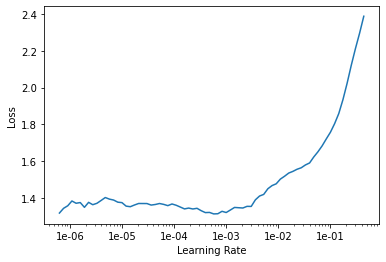

In [21]:

learn.lr_find()
learn.recorder.plot()

In [22]:
learn.fit_one_cycle(5, max_lr=slice(1e-5,1e-4))


epoch,train_loss,valid_loss,accuracy,time
0,1.327000,1.295900,0.545139,03:33
1,1.290362,1.222345,0.559028,03:34
2,1.220942,1.153909,0.604167,03:34
3,1.144165,1.139590,0.590278,03:34
4,1.085732,1.128871,0.593750,03:34


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


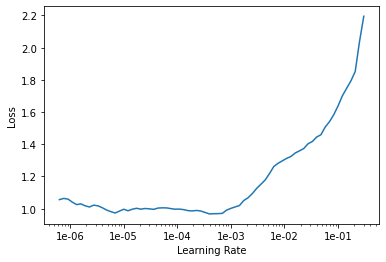

In [23]:

learn.lr_find()
learn.recorder.plot()

In [24]:
learn.fit_one_cycle(5, max_lr=slice(1e-5,1e-4))


epoch,train_loss,valid_loss,accuracy,time
0,0.994625,1.121052,0.597222,03:33
1,0.963537,1.149456,0.579861,03:28
2,0.932550,1.149211,0.586806,03:16
3,0.899492,1.113747,0.579861,03:35
4,0.875175,1.112833,0.593750,03:48


In [25]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=tfms, size=288, num_workers=4).normalize(imagenet_stats)
data.batch_size=25

In [26]:
learn.data=data
data.train_ds[0][0].shape

torch.Size([3, 288, 288])

In [27]:
data.classes


['angry', 'calm', 'disgust', 'fearful', 'happy', 'neutral', 'sad', 'surprised']

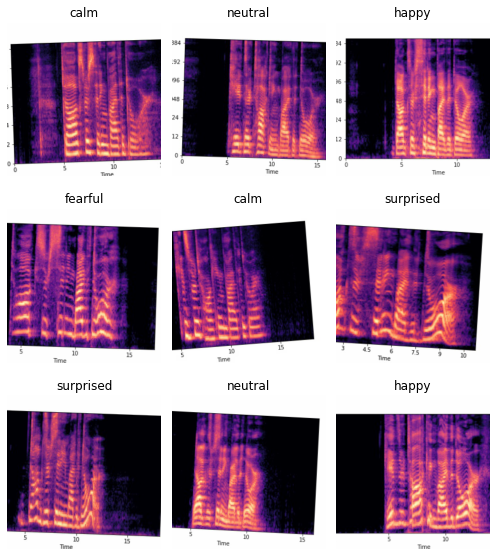

In [28]:
data.show_batch(rows=3, figsize=(7,8))


In [29]:
learn.freeze()


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


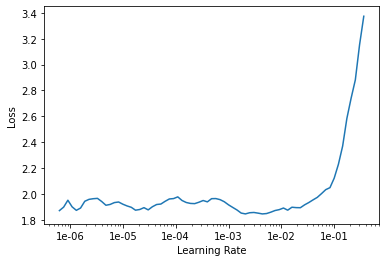

In [30]:
learn.lr_find()
learn.recorder.plot()

In [31]:
learn.fit_one_cycle(5, slice(1e-4))


epoch,train_loss,valid_loss,accuracy,time
0,2.019041,1.760351,0.371528,10:19
1,1.997610,1.672929,0.413194,10:21
2,1.912878,1.613865,0.427083,08:52
3,1.851361,1.585384,0.444444,08:49
4,1.839710,1.594733,0.434028,09:03


In [34]:
# load and show an image with Pillow
from PIL import Image
# load the image
image = Image.open('/Users/murielkosaka/Desktop/capstone_project/sorted_data/angry/03-01-05-01-01-01-01.wav.jpeg')
# summarize some details about the image
print(image.format)
print(image.mode)
print(image.size)
# show the image
image.show()

JPEG
RGB
(432, 288)


In [35]:
learn.unfreeze()


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


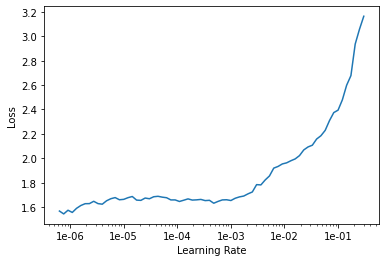

In [36]:

learn.lr_find()
learn.recorder.plot()

In [37]:
learn.fit_one_cycle(5, slice(1e-5,1e-4))


epoch,train_loss,valid_loss,accuracy,time
0,1.621561,1.356831,0.500000,12:33
1,1.460916,1.155625,0.604167,12:35
2,1.274460,0.992118,0.638889,12:34
3,1.109634,0.962795,0.666667,15:59
4,0.975974,0.956472,0.659722,39:14


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


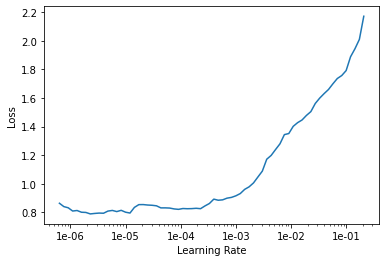

In [38]:
learn.lr_find()
learn.recorder.plot()

In [39]:
learn.fit_one_cycle(5, slice(1e-4))


epoch,train_loss,valid_loss,accuracy,time
0,0.858683,0.939944,0.666667,14:07
1,0.816365,0.901408,0.677083,13:50
2,0.773821,0.875826,0.673611,13:26
3,0.768470,0.865332,0.680556,13:42
4,0.717027,0.854234,0.687500,13:38


In [ ]:
learn.lr_find()
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(5, slice(1e-5))


In [ ]:
learn.lr_find()
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(3, slice(1e-5,1e-4))


In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

In [ ]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)
